- Reference
  - https://blog.amedama.jp/entry/2019/01/29/235642
  - 損失が減らなくなったら学習を打ち切る

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [2]:
import xgboost as xgb

In [3]:
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

In [4]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [5]:
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
}

evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}

# bst = xgb.train(xgb_params,
#                 dtrain,
#                 #num_boost_round=1000,
#                 num_boost_round=200,
#                 evals=evals,
#                 evals_result=evals_result,)
bst = xgb.train(xgb_params,
                dtrain,
                num_boost_round=1000,
                early_stopping_rounds=10,
                evals=evals,
                evals_result=evals_result)

[0]	train-logloss:0.46240	eval-logloss:0.49290
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 10 rounds.
[1]	train-logloss:0.33344	eval-logloss:0.37602
[2]	train-logloss:0.24974	eval-logloss:0.30837
[3]	train-logloss:0.19168	eval-logloss:0.26162
[4]	train-logloss:0.15087	eval-logloss:0.22837
[5]	train-logloss:0.12011	eval-logloss:0.20208
[6]	train-logloss:0.09615	eval-logloss:0.17614
[7]	train-logloss:0.07942	eval-logloss:0.16177
[8]	train-logloss:0.06669	eval-logloss:0.15044
[9]	train-logloss:0.05665	eval-logloss:0.14649
[10]	train-logloss:0.04829	eval-logloss:0.13628
[11]	train-logloss:0.04239	eval-logloss:0.13244
[12]	train-logloss:0.03736	eval-logloss:0.12173
[13]	train-logloss:0.03319	eval-logloss:0.11718
[14]	train-logloss:0.02926	eval-logloss:0.11260
[15]	train-logloss:0.02656	eval-logloss:0.11169
[16]	train-logloss:0.02429	eval-logloss:0.11039
[17]	train-logloss:0.02263	eval-logloss:0.113

In [6]:
y_pred_proba = bst.predict(dtest)
y_pred = np.where(y_pred_proba > 0.5, 1, 0)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.9649122807017544


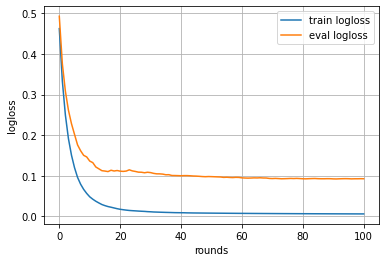

In [7]:
train_metric = evals_result['train']['logloss']
plt.plot(train_metric, label='train logloss')

eval_metric = evals_result['eval']['logloss']
plt.plot(eval_metric, label='eval logloss')

plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('logloss')
plt.show()